In [1]:
#!figsize and dpi
#!subplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)#!connects to interactive js
import plotly.express as px
cf.go_offline()

#!sk learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sqlalchemy import create_engine
#!
from sklearn.decomposition import PCA

In [2]:
customer_df=pd.read_csv("../../data_resource/Ecommerce Customers")

In [3]:
customer_df_numeric=customer_df.select_dtypes(include=np.number)

In [4]:
customer_df_numeric

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
X=customer_df_numeric.drop("Yearly Amount Spent",axis=1)

In [6]:
Y=customer_df_numeric["Yearly Amount Spent"]

In [7]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [8]:
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=101,test_size=0.3)

In [10]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [11]:
Y_train

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
          ...    
63     483.159721
326    505.230068
337    440.002748
11     522.337405
351    533.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [12]:
linear_model1=LinearRegression()

In [16]:
linear_model1.fit(X_train,Y_train)

LinearRegression()

In [18]:
predictions1=linear_model1.predict(X_test)

In [19]:
predictions1

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

In [20]:
linear_model1.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

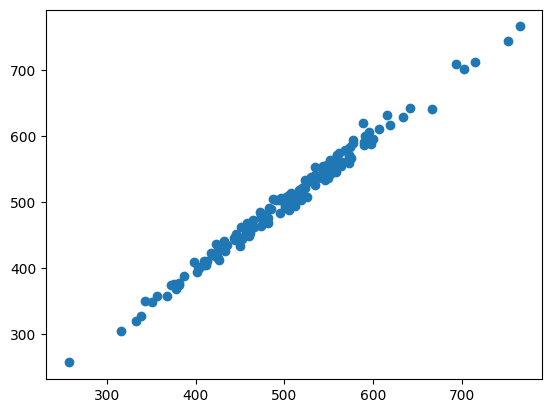

In [21]:
plt.scatter(predictions1,Y_test)

In [22]:
error=metrics.root_mean_squared_error(predictions1,Y_test)

In [23]:
error

8.933815066978624

In [24]:
import pickle

# Assume 'model' is your trained machine learning model
# For example, a scikit-learn model:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train) 

filename = 'linear_customer_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(linear_model1, file)

print(f"Model successfully saved to {filename}")


Model successfully saved to linear_customer_model.pkl
